In [222]:
import pandas as pd
import sys # Python ≥3.5 is required
assert sys.version_info >= (3, 5)
import os
import matplotlib.pyplot as plt
%matplotlib inline

cwd = os.getcwd()
file_path = 'C:\\Users\\henry\\Desktop\\ML\\BiasInML\\compas-scores-two-years.csv'
df = pd.read_csv(file_path)

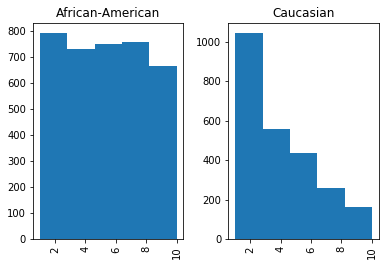

In [223]:
'''
Part 1: Comparing the scores of African-American and Caucasian defendants

Make two histograms: one with the decile scores for Caucasian defendants,
and one with the decile scores for African-American defendants. The histograms
should allow the reader to understand how the scores for Caucasian
defendants and the scores for African-American defendants differ.
'''
bfilt = df["race"]=="African-American"
wfilt = df["race"]== "Caucasian"

bdf = df[df.race=="African-American"]
wdf = df[df.race=="Caucasian"]
bwdf = df[df.race.isin(["Caucasian", "African-American"])]

# COMPAS scores for each defendant ranged from 1 to 10, with ten being the highest risk. 
# Scores 1 to 4 were labeled by COMPAS as “Low”; 
# 5 to 7 were labeled “Medium”; 
# and 8 to 10 were labeled “High.”

# hist1 = wdf["decile_score"].hist(bins = 10)
# hist2 = bdf["decile_score"].hist(bins = 10)
hists = bwdf["decile_score"].hist(bins = 5, by=df.race)

In [224]:
'''
Part 2: Initial evaluation the COMPAS scores

Suppose that defendants with COMPAS scores that are greater than or
equal to 5 are considered to be "high-risk," and other defendants are considered to be "low-risk." 
Success of the prediction is based whether an individual ends up in prison within two years (use 'is_recid' for this).

Compute the false positive rate, the false negative rate, and the correct classification rate for the entire population, 
for the population of Caucasian defendants separately, and for the population of African-American defendants separately. 
Recall that the 

false-positive rate is 
the false-positives as a portion of the true negatives and 

the false-negative rate is 
the false-negatives as a portion of the true-positives. 

State the tentative conclusions that you can draw about the fairness of the COMPAS scores.
'''

# gapminder.query('country=="United States" & year > 1996')

threshold = 5 
n_total = df.shape[0]


Race = ["", '& race=="Caucasian"', "& race=='African-American'"]

t = "is_recid==1"
f = "is_recid==0"
p = f'decile_score >= {threshold}' 
n = f'decile_score < {threshold}' 

for i in Race: 
    print(i)
    tp = t + " & "  + p + i
    fp = f + " & "  + p + i
    tn = t + " & "  + n + i
    fn = f + " & "  + n + i
    n_tp = df.query(tp).shape[0]
    n_fp = df.query(fp).shape[0]
    n_tn = df.query(tn).shape[0]
    n_fn = df.query(fn).shape[0]
    print( "False Positive Rate %f" % (n_fp/(n_fp + n_tn)))
    print( "False Negative Rate %f" % (n_fn/(n_fn + n_tp)))
    print('\n\n')







False Positive Rate 0.469298
False Negative Rate 0.545261



& race=="Caucasian"
False Positive Rate 0.397359
False Negative Rate 0.677360



& race=='African-American'
False Positive Rate 0.552273
False Negative Rate 0.391835





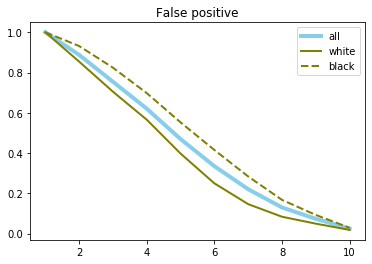

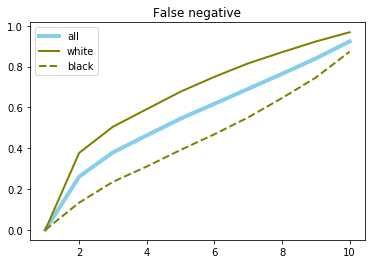

In [225]:
'''
Part 3: Altering the threshold
Recompute the rates from Part 2 for two additional score thresholds. How does this change the fairness of the predictions?
'''
afp = [] #all false pos
bfp = [] #black false pos
wfp = [] # white ...

afn = []
bfn = [] 
wfn = []

x = range(1, 11)

for threshold in range(1, 11):
    i = Race[0]
    p = f'decile_score >= {threshold}' 
    n = f'decile_score < {threshold}' 

    tp = t + " & "  + p + i
    fp = f + " & "  + p + i
    tn = t + " & "  + n + i
    fn = f + " & "  + n + i
    n_tp = df.query(tp).shape[0]
    n_fp = df.query(fp).shape[0]
    n_tn = df.query(tn).shape[0]
    n_fn = df.query(fn).shape[0]
    afp.append(n_fp/(n_fp + n_tn))
    afn.append(n_fn/(n_fn + n_tp))
    
    i = Race[1]
    tp = t + " & "  + p + i
    fp = f + " & "  + p + i
    tn = t + " & "  + n + i
    fn = f + " & "  + n + i
    n_tp = df.query(tp).shape[0]
    n_fp = df.query(fp).shape[0]
    n_tn = df.query(tn).shape[0]
    n_fn = df.query(fn).shape[0]
    wfp.append(n_fp/(n_fp + n_tn))
    wfn.append(n_fn/(n_fn + n_tp))
    
    i = Race[2]
    tp = t + " & "  + p + i
    fp = f + " & "  + p + i
    tn = t + " & "  + n + i
    fn = f + " & "  + n + i
    n_tp = df.query(tp).shape[0]
    n_fp = df.query(fp).shape[0]
    n_tn = df.query(tn).shape[0]
    n_fn = df.query(fn).shape[0]
    bfp.append(n_fp/(n_fp + n_tn))
    bfn.append(n_fn/(n_fn + n_tp))

    
# libraries
import numpy as np
 
 
# multiple line plot
plt.title("False positive")
plt.plot( x, afp, label="all" ,marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( x, wfp, label="white" ,marker='', color='olive', linewidth=2)
plt.plot( x, bfp, label="black" ,marker='', color='olive', linewidth=2, linestyle='dashed')
plt.legend()
plt.show()
# black people are flasely predicted as likely to do crime again more than they actually do 

plt.title("False negative")
plt.plot( x, afn, label="all" ,marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( x, wfn, label="white" ,marker='', color='olive', linewidth=2)
plt.plot( x, bfn, label="black" ,marker='', color='olive', linewidth=2, linestyle='dashed')
plt.legend()
